In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
base_path = "/content/drive/MyDrive/MRP_Offensive_Content_Detection/Final_Dataset/"
dataset_name = "mrp_final_dataset.csv"
df_final = pd.read_csv(base_path + dataset_name)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            6463 non-null   object
 1   majority_label  6463 non-null   object
dtypes: object(2)
memory usage: 101.1+ KB


In [ ]:
df_final.rename(columns={'majority_label': 'label'}, inplace=True)

In [ ]:
df_final['label'].value_counts()

,count
label,
Offensive,3584
Non-offensive,2879


# Compare Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df_final['text']
y = df_final['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 1. Logistic Regression


 ~~~ Logistic Regression ~~~ 
Classification Report:
               precision    recall  f1-score   support

Non-offensive       0.73      0.58      0.65       576
    Offensive       0.71      0.83      0.77       717

     accuracy                           0.72      1293
    macro avg       0.72      0.71      0.71      1293
 weighted avg       0.72      0.72      0.71      1293



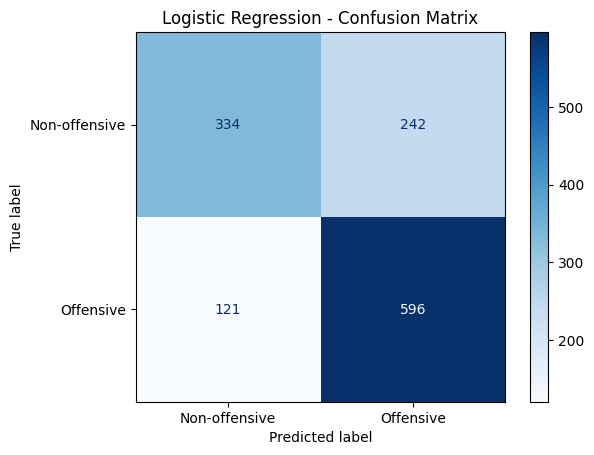

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("\n ~~~ Logistic Regression ~~~ ")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# 2. Linear SVM


 ~~~ Linear SVM ~~~ 
Classification Report:
               precision    recall  f1-score   support

Non-offensive       0.70      0.63      0.66       576
    Offensive       0.72      0.78      0.75       717

     accuracy                           0.71      1293
    macro avg       0.71      0.70      0.71      1293
 weighted avg       0.71      0.71      0.71      1293



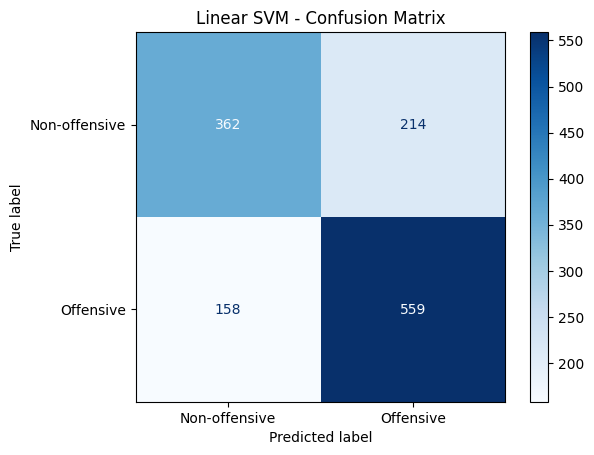

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("\n ~~~ Linear SVM ~~~ ")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Linear SVM - Confusion Matrix")
plt.show()

# 3. Naive Bayes


 ~~~ Naive Bayes ~~~ 
Classification Report:
               precision    recall  f1-score   support

Non-offensive       0.77      0.43      0.55       576
    Offensive       0.66      0.90      0.76       717

     accuracy                           0.69      1293
    macro avg       0.72      0.66      0.66      1293
 weighted avg       0.71      0.69      0.67      1293



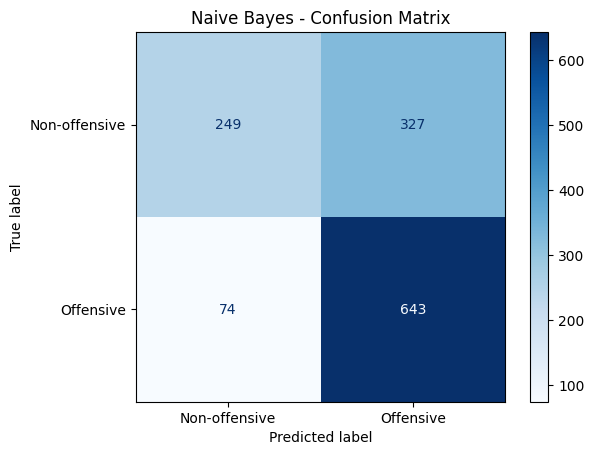

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("\n ~~~ Naive Bayes ~~~ ")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# 4. Random Forest


 ~~~ Random Forest ~~~ 
Classification Report:
               precision    recall  f1-score   support

Non-offensive       0.66      0.59      0.62       576
    Offensive       0.69      0.75      0.72       717

     accuracy                           0.68      1293
    macro avg       0.68      0.67      0.67      1293
 weighted avg       0.68      0.68      0.68      1293



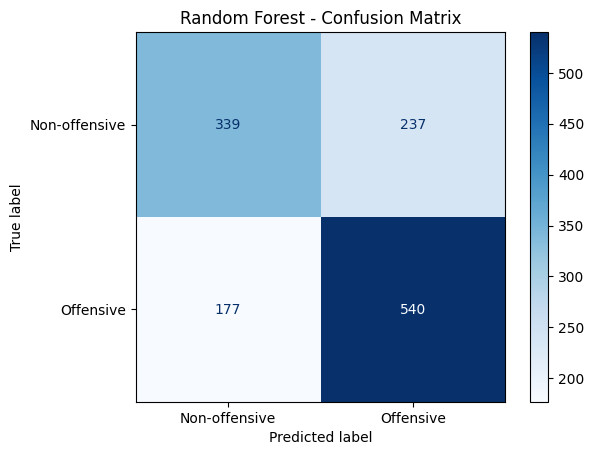

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("\n ~~~ Random Forest ~~~ ")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()